In [1]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# Mean squared error 
from sklearn.metrics import mean_squared_error

In [2]:
fileName = "xid-92685698_2.txt" 
df = pd.read_csv(fileName, delim_whitespace=True) 
df.head()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2023,1,1,0,26,999,99.0,99.0,1.12,12.50,7.69,269,9999.0,999.0,15.3,999.0,99.0,99.0
1,2023,1,1,0,56,999,99.0,99.0,1.16,11.76,7.34,272,9999.0,999.0,15.3,999.0,99.0,99.0
2,2023,1,1,1,26,999,99.0,99.0,1.20,12.50,7.08,268,9999.0,999.0,15.3,999.0,99.0,99.0
3,2023,1,1,1,56,999,99.0,99.0,1.25,10.53,7.33,268,9999.0,999.0,15.4,999.0,99.0,99.0
4,2023,1,1,2,26,999,99.0,99.0,1.27,10.53,7.57,268,9999.0,999.0,15.5,999.0,99.0,99.0


In [3]:
df.shape

(17285, 18)

In [4]:
df_w = df[["DPD","APD","MWD","WTMP","WVHT"]]
df_w.head()

,DPD,APD,MWD,WTMP,WVHT
0,12.50,7.69,269,15.3,1.12
1,11.76,7.34,272,15.3,1.16
2,12.50,7.08,268,15.3,1.20
3,10.53,7.33,268,15.4,1.25
4,10.53,7.57,268,15.5,1.27


In [5]:
xVal = df_w[['DPD','APD','WTMP','MWD']].to_numpy()
yVal = np.array(df_w['WVHT'])

In [6]:
from sklearn.model_selection import train_test_split
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(xVal, yVal, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Baseline linear model

In [7]:
lm= linear_model.LinearRegression()
lm.fit(X_train_temp,y_train_temp)
lm_y1 = lm.predict(X_train_temp)
lm_y2 = lm.predict(X_test)
lm_y3 = lm.predict(X_val)
lm_err = mean_squared_error(lm_y1,y_train_temp)
print(mean_squared_error(lm_y1,y_train_temp))
print(mean_squared_error(lm_y2,y_test))
print(mean_squared_error(lm_y3,y_val))
#print(lm.score(X_train_temp, y_train_temp))

1.694412020877801
2.774359592268051
1.903864058753195


# Decision Tree regressor


In [8]:
dtr = DecisionTreeRegressor(criterion = 'squared_error')
dtr.fit(X_train_temp, y_train_temp)
ypred = dtr.predict(X_train_temp)
score = dtr.score(X_train_temp,y_train_temp)

print(mean_squared_error(y_train_temp,ypred), "| score - ", score)

3.684553080705814e-05 | score -  0.9999917114288527


In [9]:
dtr = DecisionTreeRegressor(criterion = 'squared_error')
dtr.fit(X_train_temp, y_train_temp)
ypred = dtr.predict(X_test)
score = dtr.score(X_test,y_test)
print(mean_squared_error(y_test,ypred), "| score - ", score)

0.135715008675535 | score -  0.9880455519701898


In [10]:
dtr = DecisionTreeRegressor(criterion = 'squared_error')
dtr.fit(X_train_temp, y_train_temp)
ypred = dtr.predict(X_val)
score = dtr.score(X_val,y_val)
print(mean_squared_error(y_val,ypred), "| score - ", score)

0.15219597800925924 | score -  0.9737448195909166


# Random forest regressor

In [51]:
rfr = RandomForestRegressor(n_estimators = 25, random_state=0)
rfr.fit(X_train_temp, y_train_temp)
ypred = rfr.predict(X_train_temp)
score = rfr.score(X_train_temp,y_train_temp)
print(mean_squared_error(y_train_temp,ypred), "| score - ", score) 

0.01239699311320952 | score -  0.9972112395402761


In [52]:
rfr = RandomForestRegressor(n_estimators = 25, random_state=0)
rfr.fit(X_train_temp, y_train_temp)
ypred = rfr.predict(X_test)
score = rfr.score(X_test,y_test)
print(mean_squared_error(y_test,ypred), "| score - ", score) 

0.07505916097078594 | score -  0.9933884185121217


In [46]:
rfr = RandomForestRegressor(n_estimators = 25, random_state=0)
rfr.fit(X_train_temp, y_train_temp)
ypred = rfr.predict(X_val)
score = rfr.score(X_val,y_val)
print(mean_squared_error(y_val,ypred), "| score - ", score) 

0.08554942931693225 | score -  0.9852419510029791


1. Fit a decision tree regressor and random forest regressor with 25 trees. Compare with a baseline linear model of your choice. Which model performs best? Report performance on the training, validation, and test dataset.
 - For the training set, decision tree regressor worked the best but for validation and test set, random forest model performed the best.

2. What cost function are you using for each model?
- For the baseline linear model, the cost function is the root mean squaured
- For the decision tree model, the cost function is the squared error.
- For the random forest model, the cost function is the gini impurity. 

3. What(if any)hyperparameters did you optimize?
- when I changed the cost function while fitting the test dataset to 'absolute_error' in decision tree regressor model, the mean squared error between the predicted and the y values in the test dataset increased.

In [56]:
dtr = DecisionTreeRegressor(criterion = 'absolute_error')
dtr.fit(X_train_temp, y_train_temp)
ypred = dtr.predict(X_val)
score = dtr.score(X_val,y_val)
print(mean_squared_error(y_val,ypred), "| score - ", score)

0.14534561631944445 | score -  0.9749265688354507


4. If you redo your train/validation splits, do you get the same answers?
- yes, I get the same answers when I redo my train/validation splits.

5. Train a random forest model on this prediction task with a 2, 10, 25, 50, 100, 250, 500, & 1,000 trees. Plot the training and validation error as a function of number of trees.

In [39]:
trees = [2,10,25,50,100,250,500,1000]
for i in trees:             
    rfr = RandomForestRegressor(n_estimators=i, random_state=0)
    rfr.fit(X_train_temp, y_train_temp)
    ypred1 = rfr.predict(X_train_temp)
    score = rfr.score(X_train_temp,y_train_temp)
    print(mean_squared_error(y_train_temp,ypred1), "| score - ", score)    

0.033228148845538846 | score -  0.9925251755160275
0.014850332206272299 | score -  0.9966593496590325
0.01239699311320952 | score -  0.9972112395402761
0.011335379872627787 | score -  0.9974500543078425
0.010835707179337444 | score -  0.997562457971951
0.010638198320094971 | score -  0.9976068884957136
0.010558458836090062 | score -  0.9976248262583662
0.010519811130225418 | score -  0.9976335202370585


In [18]:
trees = [2,10,25,50,100,250,500,1000]
error1 =[]
for i in trees:             
    rfr = RandomForestRegressor(n_estimators=i, random_state=0)
    rfr.fit(X_train_temp, y_train_temp)
    ypred = rfr.predict(X_train_temp)
    score = rfr.score(X_train_temp,y_train_temp)
    err = (mean_squared_error(y_train_temp,ypred))
    error1.append(err)


<Axes: >

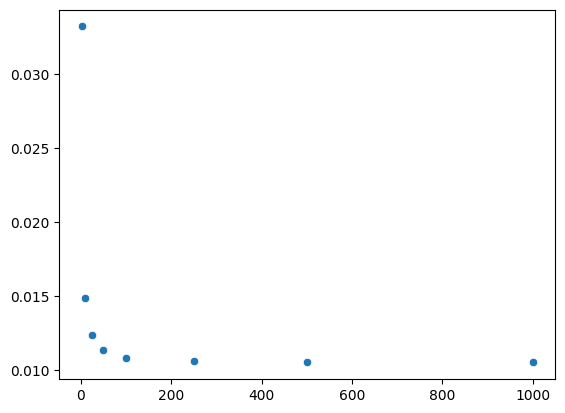

In [19]:
sns.scatterplot(x = trees, y = error1)

In [20]:
trees = [2,10,25,50,100,250,500,1000]
for i in trees:             
    rfr = RandomForestRegressor(max_depth=i, random_state=0)
    rfr.fit(X_train_temp, y_train_temp)
    ypred2 = rfr.predict(X_val)
    score = rfr.score(X_val,y_val)
    print(mean_squared_error(y_val,ypred2), "| score - ", score) 

0.19241791318774726 | score -  0.9668061726021677
0.09855251830882866 | score -  0.9829988007448504
0.08293772882610889 | score -  0.9856924929191188
0.0827312588199406 | score -  0.9857281108594345
0.0827312588199406 | score -  0.9857281108594345
0.0827312588199406 | score -  0.9857281108594345
0.0827312588199406 | score -  0.9857281108594345
0.0827312588199406 | score -  0.9857281108594345


In [21]:
trees = [2,10,25,50,100,250,500,1000]
error2 =[]
for i in trees:             
    rfr = RandomForestRegressor(n_estimators=i, random_state=0)
    rfr.fit(X_train_temp, y_train_temp)
    ypred = rfr.predict(X_val)
    score = rfr.score(X_val,y_val)
    err = (mean_squared_error(y_val,ypred))
    error2.append(err)


<Axes: >

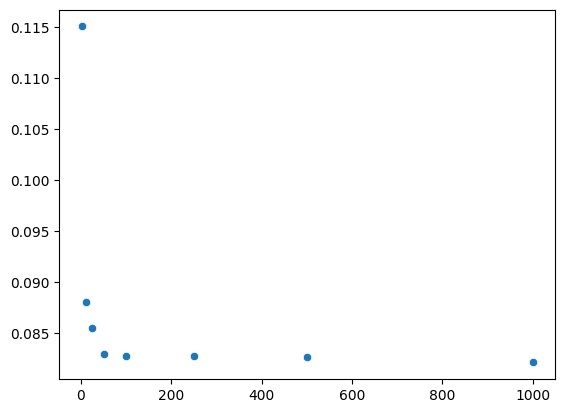

In [22]:
sns.scatterplot(x = trees, y = error2)

In [23]:
trees = [2,10,25,50,100,250,500,1000]
for i in trees:             
    rfr = RandomForestRegressor(max_depth=i, random_state=0)
    rfr.fit(X_train_temp, y_train_temp)
    ypred3 = rfr.predict(X_test)
    score = rfr.score(X_test,y_test)
    print(mean_squared_error(y_test,ypred3), "| score - ", score) 

0.20007564380412163 | score -  0.9823763494603206
0.08829908444141922 | score -  0.9922221806833583
0.07321429607694536 | score -  0.993550923320622
0.07287887158664125 | score -  0.9935804691658192
0.07287887158664125 | score -  0.9935804691658192
0.07287887158664125 | score -  0.9935804691658192
0.07287887158664125 | score -  0.9935804691658192
0.07287887158664125 | score -  0.9935804691658192


In [24]:
trees = [2,10,25,50,100,250,500,1000]
error3 =[]
for i in trees:             
    rfr = RandomForestRegressor(n_estimators=i, random_state=0)
    rfr.fit(X_train_temp, y_train_temp)
    ypred = rfr.predict(X_test)
    score = rfr.score(X_test,y_test)
    err = (mean_squared_error(y_test,ypred))
    error3.append(err)

<Axes: >

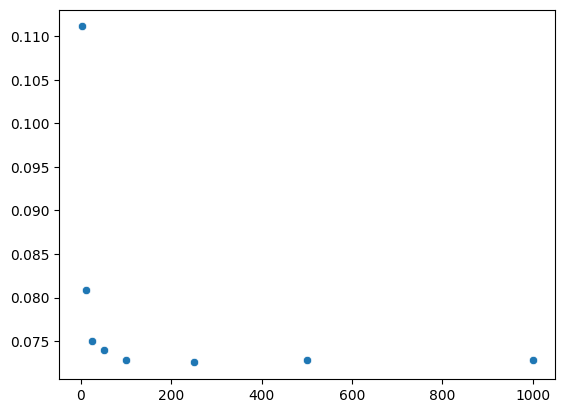

In [25]:
sns.scatterplot(x = trees, y = error3)

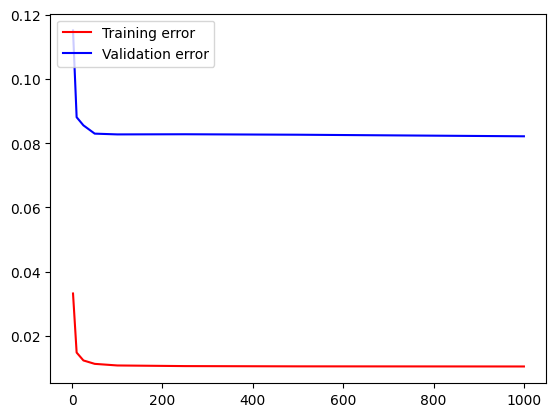

In [58]:
plt.plot(trees, error1, "-r", label="Training error")
plt.plot(trees, error2, "-b", label="Validation error" )
plt.legend(loc="upper left")
plt.show()

6. Do you have evidence of overfitting to the training dataset with 1,000 trees?
- The above plot shows evidence of overfitting to the training dataset. Low training error with high validation error. 